Welcome to The Next Level Down – Machine Learning Fundamentals which is a component of the AI Immersion Course that will introduce some technical aspects of machine learning.

So first what is this document?  .ipynbs are Juypter Notebooks.  These files are used in data science to code with data.  This Juypter notebook is in the Python programming language.  For a quick history of Python, here is a link:

https://www.w3schools.com/python/python_intro.asp



So why do we use Juypter Notebooks?  They are used because they offer an easy graphical interface that has different markdown and code blocks.  The ability to annotate and code in line via the different blocks is visually organized and appealing.  

Also, as you are likely doing, they can be run via a web browser!  Using something like google colab or anaconda allows for many of the common python packages to be pre-installed and configured for use in the notebook.  

One call out with Jupyter Notebooks is that they don't just support Python!  In fact they support over 40 different languages:

https://jupyter.org/

https://github.com/jupyter/jupyter/wiki/Jupyter-kernels

including.......R, Rust, Scala, Stata, SQL, Julia, and more!  


Today we are going to build a classification model.  What is a classification model?

A Classification model is a model, which accepts inputs (features) and generates outputs (classifications).  

What are the types of classifications models?

- Binary classification (Survival- each input is mapped to one classification)

- Multi-class classification (Vehicle types- each vehicle is mapped to one classification)

- Multi-label classification (Photos- one photo can be mapped to multiple labels)

What examples can you think of for each of the types?


Great Google Video on classification models:

https://developers.google.com/machine-learning/crash-course/classification/video-lecture



In [16]:
#start all imports for modules that will be used in the classification example

# data processing
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# machine learning
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

What we just ran imported the libraries that we will need for the notebook functions.  

In [17]:
#read csv from website and assign to df_base
url = "https://raw.githubusercontent.com/Beenjamming/ClassificationExample/main/DM_Sample.csv"
df_base = pd.read_csv(url)
df_base.head()


,age,Sex,HAS_DIABETES_YN,HAS_CHF_YN,NUM_ED_VIS,NUM_HOSP_ADMSNS,ON_ANTHYPERT_YN,BMI_LAST,BP_SYS_LAST,BP_DIA_LAST,HAD_HEART_ATTACK_YN,HAS_DEPRESSION_YN,TTL_CHL_LAST,HbA1c
0,64,Male,Y,0,0,0,1,23.52,124.0,75.0,0,0,207.0,7.1
1,59,Female,Y,0,0,1,1,28.67,101.0,63.0,0,0,222.0,12.3
2,72,Female,N,0,0,0,0,24.15,102.0,62.0,0,0,213.0,5.8
3,73,Male,Y,0,3,5,1,19.78,155.0,58.0,0,1,103.0,8.1
4,65,Female,Y,0,0,1,1,52.02,118.0,60.0,0,0,190.0,6.4


Lets stop for a second.....what did we just do?  

1. We set a url as a variable
2. We read the url CSV into a dataframe
3. We displayed the top 5 rows of the dataframe

Now lets start taking a look at our data.

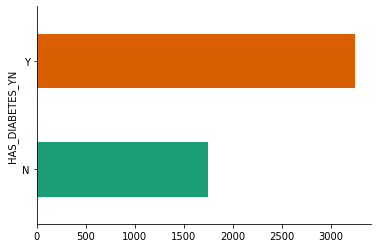

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns
df_base.groupby('HAS_DIABETES_YN').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

What does this tell us about our dataset?  Do more patients have diabetes than do not have diabetes?  Is this reflective of a real world scenario?  

In [19]:
#data types for the columns in the dataframe
df_base.dtypes

age                      int64
Sex                     object
HAS_DIABETES_YN         object
HAS_CHF_YN               int64
NUM_ED_VIS               int64
NUM_HOSP_ADMSNS          int64
ON_ANTHYPERT_YN          int64
BMI_LAST               float64
BP_SYS_LAST            float64
BP_DIA_LAST            float64
HAD_HEART_ATTACK_YN      int64
HAS_DEPRESSION_YN        int64
TTL_CHL_LAST           float64
HbA1c                   object
dtype: object

In [20]:
#value counts of the target variable

df_base.HAS_DIABETES_YN.value_counts()

Y    3251
N    1749
Name: HAS_DIABETES_YN, dtype: int64

c:\Users\MICHAELSB\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


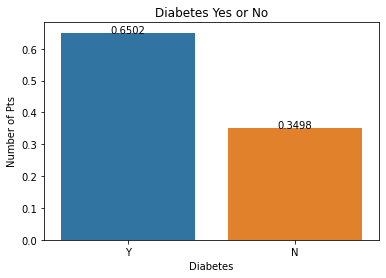

In [21]:
#visualize the data

import matplotlib.pyplot as plt
import seaborn as sns
count = df_base.HAS_DIABETES_YN.value_counts(normalize=True) #normalize to get percentages.....change to False to get actual count
sns.barplot(count.index,count.values)
#Y = Red and N = Blue 
plt.title('Diabetes Yes or No')
plt.ylabel('Number of Pts')
plt.xlabel('Diabetes')
#display the percentage of each class
for i in range(count.shape[0]):
    plt.text(i,count[i],count[i],ha='center')
plt.show()

In [22]:
df_base.describe()

,age,HAS_CHF_YN,NUM_ED_VIS,NUM_HOSP_ADMSNS,ON_ANTHYPERT_YN,BMI_LAST,BP_SYS_LAST,BP_DIA_LAST,HAD_HEART_ATTACK_YN,HAS_DEPRESSION_YN,TTL_CHL_LAST
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4834.000000,4834.000000,5000.000000,5000.000000,3807.000000
mean,68.899200,0.115200,0.212800,0.389600,0.752600,37.454788,130.515515,68.867398,0.040000,0.259200,164.793276
std,15.364812,0.319295,0.682649,0.952047,0.431544,459.778852,16.729585,12.263724,0.195979,0.438239,42.607572
min,11.000000,0.000000,0.000000,0.000000,0.000000,14.510000,61.000000,0.000000,0.000000,0.000000,53.000000
25%,61.000000,0.000000,0.000000,0.000000,1.000000,23.760000,120.000000,60.000000,0.000000,0.000000,135.000000
50%,71.000000,0.000000,0.000000,0.000000,1.000000,27.005000,130.000000,69.000000,0.000000,0.000000,160.000000
75%,79.000000,0.000000,0.000000,0.000000,1.000000,31.390000,140.000000,77.000000,0.000000,1.000000,189.000000
max,104.000000,1.000000,16.000000,16.000000,1.000000,24590.710000,225.000000,141.000000,1.000000,1.000000,560.000000


In [23]:
df_base.isnull().sum()

age                       0
Sex                       0
HAS_DIABETES_YN           0
HAS_CHF_YN                0
NUM_ED_VIS                0
NUM_HOSP_ADMSNS           0
ON_ANTHYPERT_YN           0
BMI_LAST                  0
BP_SYS_LAST             166
BP_DIA_LAST             166
HAD_HEART_ATTACK_YN       0
HAS_DEPRESSION_YN         0
TTL_CHL_LAST           1193
HbA1c                   888
dtype: int64

C:\Users\MICHAELSB\AppData\Local\Temp\ipykernel_22228\995918547.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df_base.corr()


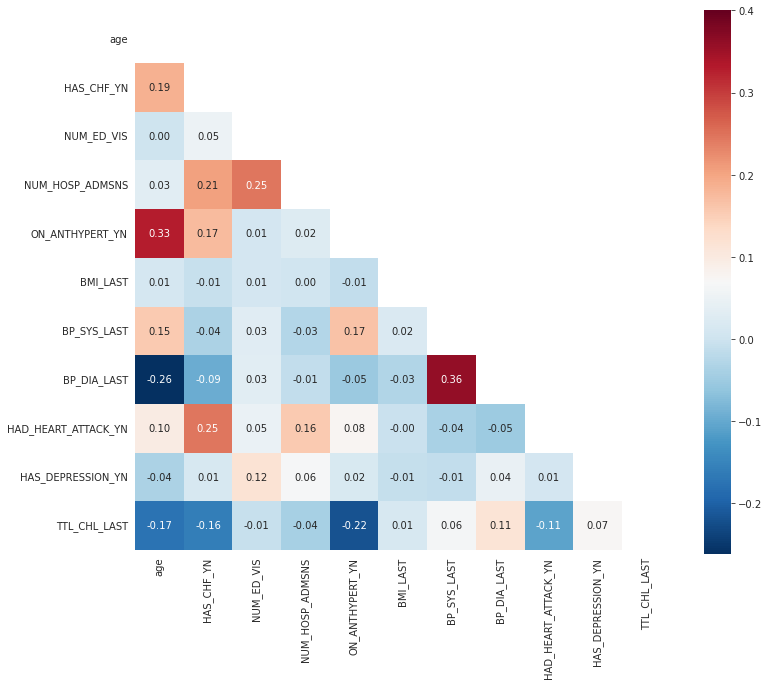

In [24]:
corrMatrix = df_base.corr()
import numpy as np
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(corrMatrix, mask=mask, vmax=.4, square=True, annot=True, fmt='.2f', cmap='RdBu_r')

In [25]:
df_base['HAS_DIABETES_YN'] = df_base['HAS_DIABETES_YN'].map({'Y':1, 'N':0})
df_base.dropna(axis=0, how='any', inplace=True)
df_base.describe

<bound method NDFrame.describe of       age     Sex  HAS_DIABETES_YN  HAS_CHF_YN  NUM_ED_VIS  NUM_HOSP_ADMSNS  \
0      64    Male                1           0           0                0   
1      59  Female                1           0           0                1   
2      72  Female                0           0           0                0   
3      73    Male                1           0           3                5   
4      65  Female                1           0           0                1   
...   ...     ...              ...         ...         ...              ...   
4994   64  Female                1           0           0                0   
4995   74    Male                0           0           0                0   
4996   70    Male                1           0           0                0   
4997   76    Male                0           0           0                0   
4998   45  Female                0           0           0                0   

      ON_ANTHYPER

In [26]:
df_base.isnull().sum()

age                    0
Sex                    0
HAS_DIABETES_YN        0
HAS_CHF_YN             0
NUM_ED_VIS             0
NUM_HOSP_ADMSNS        0
ON_ANTHYPERT_YN        0
BMI_LAST               0
BP_SYS_LAST            0
BP_DIA_LAST            0
HAD_HEART_ATTACK_YN    0
HAS_DEPRESSION_YN      0
TTL_CHL_LAST           0
HbA1c                  0
dtype: int64

In [27]:
df_base.Sex.value_counts()

Female       1880
Male         1660
Nonbinary       1
Name: Sex, dtype: int64

In [28]:
df_base = df_base[df_base.Sex != 'Nonbinary']
df_base.Sex.value_counts()

Female    1880
Male      1660
Name: Sex, dtype: int64

In [29]:
df_base.rename(columns={'Sex':'Female'}, inplace=True)
df_base['Female'].replace({'Female': 1, 'Male':0}, inplace=True)
df_base.head()

C:\Users\MICHAELSB\AppData\Local\Temp\ipykernel_22228\3503996057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base.rename(columns={'Sex':'Female'}, inplace=True)
C:\Users\MICHAELSB\AppData\Local\Temp\ipykernel_22228\3503996057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['Female'].replace({'Female': 1, 'Male':0}, inplace=True)


,age,Female,HAS_DIABETES_YN,HAS_CHF_YN,NUM_ED_VIS,NUM_HOSP_ADMSNS,ON_ANTHYPERT_YN,BMI_LAST,BP_SYS_LAST,BP_DIA_LAST,HAD_HEART_ATTACK_YN,HAS_DEPRESSION_YN,TTL_CHL_LAST,HbA1c
0,64,0,1,0,0,0,1,23.52,124.0,75.0,0,0,207.0,7.1
1,59,1,1,0,0,1,1,28.67,101.0,63.0,0,0,222.0,12.3
2,72,1,0,0,0,0,0,24.15,102.0,62.0,0,0,213.0,5.8
3,73,0,1,0,3,5,1,19.78,155.0,58.0,0,1,103.0,8.1
4,65,1,1,0,0,1,1,52.02,118.0,60.0,0,0,190.0,6.4


In [30]:
df_base['HbA1c'] = df_base['HbA1c'].replace('>14.0',14)
df_base['HbA1c'] = df_base['HbA1c'].replace('<4.0',4)
df_base['HbA1c'] = df_base['HbA1c'].astype(float)

C:\Users\MICHAELSB\AppData\Local\Temp\ipykernel_22228\2096870457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['HbA1c'] = df_base['HbA1c'].replace('>14.0',14)
C:\Users\MICHAELSB\AppData\Local\Temp\ipykernel_22228\2096870457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base['HbA1c'] = df_base['HbA1c'].replace('<4.0',4)
C:\Users\MICHAELSB\AppData\Local\Temp\ipykernel_22228\2096870457.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

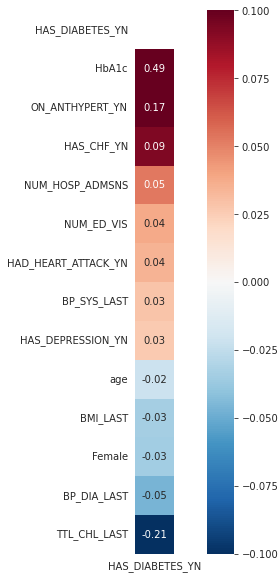

In [31]:
corrMatrix = df_base.corr()
corrMatrix = corrMatrix[['HAS_DIABETES_YN']].sort_values(by='HAS_DIABETES_YN', ascending=False)
import numpy as np
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(corrMatrix, mask=mask, vmax=0.1, vmin=-0.1, square=True, annot=True, fmt='.2f', cmap='RdBu_r')

In [32]:
data = df_base.sample(frac=0.5, random_state=786)
data_unseen = df_base.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

Data for Modeling: (1770, 14)
Unseen Data For Predictions (1770, 14)


In [33]:
X_train = data.drop('HAS_DIABETES_YN', axis=1)
Y_train = data["HAS_DIABETES_YN"]

X_test = data_unseen.drop('HAS_DIABETES_YN', axis=1)
Y_test = data_unseen["HAS_DIABETES_YN"]

In [34]:
Y_train.head()

0    0
1    0
2    1
3    1
4    1
Name: HAS_DIABETES_YN, dtype: int64

In [35]:
# Logistic Regression
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
logreg = LogisticRegression()
logreg.fit(X_scaled, Y_train)
Y_pred = logreg.predict(X_test)
lr_acc = accuracy_score(Y_test, Y_pred)
print(lr_acc)


0.3192090395480226


c:\Users\MICHAELSB\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [36]:
# Support Vector Machines
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
svm_acc = accuracy_score(Y_test, Y_pred)
print(svm_acc)

0.6807909604519774


In [37]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
knn_acc = accuracy_score(Y_test, Y_pred)
print(knn_acc)

0.6406779661016949


In [39]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
gnb_acc = accuracy_score(Y_test, Y_pred)
print(gnb_acc)

0.8005649717514124


In [41]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
dt_acc = accuracy_score(Y_test, Y_pred)
print(dt_acc)

0.7994350282485876


In [42]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Naive Bayes','Decision Tree'],
    'Score': [svm_acc, knn_acc,lr_acc ,gnb_acc, dt_acc]})

models.sort_values(by='Score', ascending=False)

,Model,Score
3,Naive Bayes,0.800565
4,Decision Tree,0.799435
0,Support Vector Machines,0.680791
1,KNN,0.640678
2,Logistic Regression,0.319209


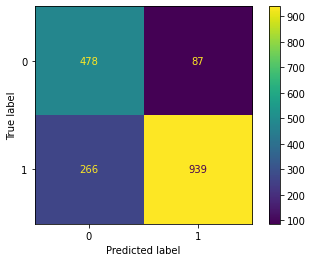

Unseen Data For Predictions (1770, 14)


In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = gaussian.predict(X_test)
cm = confusion_matrix(Y_test, predictions, labels=decision_tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=decision_tree.classes_)
disp.plot()
plt.show()

print('Unseen Data For Predictions ' + str(data_unseen.shape))